In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import typing as tp
import os

sns.set_theme(rc={'figure.figsize': (8.25, 5.875), 'figure.dpi': 100, 'axes.labelpad': 2, 'savefig.pad_inches': .5})

2022-10-22 15:15:22.704627: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-22 15:15:22.979117: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-22 15:15:22.979131: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-22 15:15:23.020016: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 15:15:23.774592: W tensorflow/stream_executor/platform/de

In [2]:
df_correct: pd.DataFrame = pd.read_pickle(os.path.join('..', 'data', 'SemesterProject', 'processed_data.pkl'))
df_incorrect: pd.DataFrame = pd.read_pickle(os.path.join('..', 'data', 'SemesterProject', 'processed_data_incorrect.pkl'))
df: pd.DataFrame = pd.concat([df_correct, df_incorrect], ignore_index=True).astype({'is_correct_movements': np.int8})  

df

,movement_id,subject_id,episode_num,positions,angles,positions_path,angles_path,skeleton,is_correct_movements,movement_name,filled_skeleton,reshaped_skeleton
0,4,6,3,"[[-3.02874, 75.90507, -270.5936, 0.0, 27.79706...","[[0.14469, 0.65008, -0.55925, 2.28859, 1.14512...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-3.02874, -3.0521766666666665, -3.233198000...",1,side_lunge,"[[[-3.02874, -3.02874, -3.0521766666666665, -3...","[[[-3.02874, -3.02874, -3.0521766666666665], [..."
1,5,7,8,"[[-1.38662, 84.46687, -232.60986, 0.0, 28.7417...","[[1.29924, -0.9601, -1.45577, 1.84614, 0.07701...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-1.38662, -1.3767133333333332, -1.343484, -...",1,sit_to_stand,"[[[-1.38662, -1.3767133333333332, -1.343484, -...","[[[-1.38662, -1.3767133333333332, -1.343484], ..."
2,3,1,7,"[[-12.26233, 81.59789, -248.86124, -2e-05, 27....","[[4.66077, 56.68494, 0.06777, 1.09106, 3.04529...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-12.26233, -12.32828, -12.324802, -12.30633...",1,inline_lunge,"[[[-12.26233, -12.26233, -12.32828, -12.32828,...","[[[-12.26233, -12.26233, -12.32828], [-12.3282..."
3,3,2,8,"[[-32.37641, 83.38937, -259.35818, 0.0, 30.475...","[[6.7506, 30.05265, -0.95628, 1.56654, 5.7209,...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-32.37641, -32.4872, -32.529323999999995, -...",1,inline_lunge,"[[[-32.37641, -32.37641, -32.4872, -32.4872, -...","[[[-32.37641, -32.37641, -32.4872], [-32.4872,..."
4,1,2,4,"[[-5.75375, 91.87819, -256.75516, 0.0, 31.3124...","[[18.99975, 1.46816, -1.66474, 2.46127, -1.360...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-5.75375, -5.718733333333334, -5.70244, -5....",1,deep_squat,"[[[-5.75375, -5.75375, -5.718733333333334, -5....","[[[-5.75375, -5.75375, -5.718733333333334], [-..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5,6,3,"[[-2.63476, 83.50163, -240.37843, 0.0, 28.2200...","[[15.84974, -4.20364, -1.17937, 0.35739, 0.051...",../data/SemesterProject/Incorrect Segmented Mo...,../data/SemesterProject/Incorrect Segmented Mo...,"[[[-2.63476, -2.624546666666667, -2.6119, -2.5...",0,sit_to_stand,"[[[-2.63476, -2.624546666666667, -2.6119, -2.5...","[[[-2.63476, -2.624546666666667, -2.6119], [-2..."
1996,9,2,4,"[[-5.71642, 91.27028, -254.8842, 0.0, 31.52043...","[[-0.56814, -1.42729, 1.82979, 1.79609, -2.207...",../data/SemesterProject/Incorrect Segmented Mo...,../data/SemesterProject/Incorrect Segmented Mo...,"[[[-5.71642, -5.722166666666666, -5.7173, -5.7...",0,standing_shoulder_internal-external_rotation,"[[[-5.71642, -5.71642, -5.722166666666666, -5....","[[[-5.71642, -5.71642, -5.722166666666666], [-..."
1997,5,2,9,"[[-9.46943, 90.67174, -237.1367, 0.0, 31.4319,...","[[8.66695, -2.79748, -0.58766, 2.4597, -2.9478...",../data/SemesterProject/Incorrect Segmented Mo...,../data/SemesterProject/Incorrect Segmented Mo...,"[[[-9.46943, -9.475143333333333, -9.471862, -9...",0,sit_to_stand,"[[[-9.46943, -9.46943, -9.475143333333333, -9....","[[[-9.46943, -9.46943, -9.475143333333333], [-..."
1998,10,3,5,"[[-7.09957, 80.66993, -223.96956, 0.0, 31.1741...","[[1.71686, -2.48381, 0.568, 1.88909, 0.89951, ...",../data/SemesterProject/Incorrect Segmented Mo...,../data/SemesterProject/Incorrect Segmented Mo...,"[[[-7.09957, -7.143396666666667, -7.1779740000...",0,standing_shoulder_scaption,"[[[-7.09957, -7.09957, -7.143396666666667, -7....","[[[-7.09957, -7.09957, -7.143396666666667], [-..."


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X: np.ndarray = np.stack(df['reshaped_skeleton'].values)
y_rw: np.ndarray = df['is_correct_movements'].values  
y_ex: np.ndarray = df['movement_id'].values - 1

X.shape, y_rw.shape, y_ex.shape

((2000, 180, 22, 3), (2000,), (2000,))

In [5]:
X_train, X_test, y_rw_train, y_rw_test, y_ex_train, y_ex_test = train_test_split(X, y_rw, y_ex, random_state=13, shuffle=True, train_size=.75)
X_train.shape, X_test.shape, y_rw_train.shape, y_rw_test.shape, y_ex_train.shape, y_ex_test.shape

((1500, 180, 22, 3), (500, 180, 22, 3), (1500,), (500,), (1500,), (500,))

In [6]:
batch_size: int = 64
n_time_frames: int = X.shape[1]

In [108]:
tf.keras.backend.clear_session()

norm_layer = tf.keras.layers.Normalization(axis=None)
norm_layer.adapt(X_train)

normed_data = norm_layer(X_train)

main_in = tf.keras.layers.Input((n_time_frames, 22, 3), name='main_in')
main_norm = norm_layer(main_in)
main_reshape = tf.keras.layers.Reshape((n_time_frames, -1))(main_norm)

ex_classer_lstm1 = tf.keras.layers.LSTM(units=64, return_sequences=True, name='exercise_classifier_lstm1')(main_reshape)
ex_classer_lstm2 = tf.keras.layers.LSTM(units=32, return_sequences=False, name='exercise_classifier_lstm2')(ex_classer_lstm1)
ex_classer_output = tf.keras.layers.Dense(units=10, activation='softmax', name='exercise_classifier_output')(ex_classer_lstm2)


# rw_classer_data_lstm1 = tf.keras.layers.LSTM(32, return_sequences=False, name='right_wrong_data_lstm1')(rw_classer_data_flatten)
# rw_classer_data_dense1 = tf.keras.layers.Dense((n_time_frames, 32), name='right_wrong_data_dense1', activation='selu')(rw_classer_data_reshape1)
# rw_classer_data_rnn1 = tf.keras.layers.GRU(units=32, return_sequences=False)(rw_classer_data_reshape1)
# rw_classer_data_flatten2 = tf.keras.layers.Reshape((-1, ))(rw_classer_data_dense1)

# TODO: try just straight Dense layers in rw_classer
# Or just do ex_classer_out as shape (n_time_frames, 10) And concat it to the actual data (axis=2)
# And run some lstms on that.

rw_classer_data_lstm1 = tf.keras.layers.LSTM(32, return_sequences=True, name='right_wrong_data_lstm1')(main_reshape)
# rw_classer_data_lstm2 = tf.keras.layers.LSTM(16, return_sequences=False, name='right_wrong_data_lstm2')(rw_classer_data_lstm1)
rw_classer_data_reshape2 = tf.keras.layers.Reshape((-1, ))(rw_classer_data_lstm1)
# rw_classer_data_dense2 = tf.keras.layers.Dense(32, name='right_wrong_data_dense2', activation='relu')(rw_classer_data_reshape2)
rw_classer_data_lrelu1 = tf.keras.layers.LeakyReLU()(rw_classer_data_reshape2)

# rw_classer_class_dense1 = tf.keras.layers.Dense(units=8, name='right_wrong_exercise_class_dense1')(ex_classer_output) # rw_classer_in_ex_class

# rw_classer_class_reshape1 = tf.keras.layers.Reshape((1, -1))(ex_classer_output)

rw_classer_concat = tf.keras.layers.concatenate([ex_classer_output, rw_classer_data_lrelu1], axis=1)
rw_classer_reshape = tf.keras.layers.Reshape((-1, ))(rw_classer_concat)

rw_classer_lrelu = tf.keras.layers.LeakyReLU()(rw_classer_reshape)
# rw_classer_dense2 = tf.keras.layers.Dense(units=32, activation='relu', name='right_wrong_dense2')(rw_classer_lrelu)

rw_classer_dense3 = tf.keras.layers.Dense(units=16, activation='relu', name='right_wrong_dense3')(rw_classer_lrelu)
rw_classer_output = tf.keras.layers.Dense(units=2, name='right_wrong_out', activation='softmax')(rw_classer_dense3)

full_model: tf.keras.Model = tf.keras.Model([main_in], [ex_classer_output, rw_classer_output])


exercise_classifier_model = tf.keras.Model(full_model.input, full_model.get_layer('exercise_classifier_output').output)
right_wrong_classifier_model = tf.keras.Model([full_model.input, full_model.get_layer('exercise_classifier_output').output], full_model.get_layer('right_wrong_out').output) # [rw_classer_in_data, rw_classer_in_ex_class], rw_classer_output)

full_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_in (InputLayer)           [(None, 180, 22, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 normalization (Normalization)  (None, 180, 22, 3)   3           ['main_in[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 180, 66)      0           ['normalization[0][0]']          
                                                                                                  
 exercise_classifier_lstm1 (LST  (None, 180, 64)     33536       ['reshape[0][0]']            

In [109]:
exercise_classifier_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_in (InputLayer)        [(None, 180, 22, 3)]      0         
                                                                 
 normalization (Normalizatio  (None, 180, 22, 3)       3         
 n)                                                              
                                                                 
 reshape (Reshape)           (None, 180, 66)           0         
                                                                 
 exercise_classifier_lstm1 (  (None, 180, 64)          33536     
 LSTM)                                                           
                                                                 
 exercise_classifier_lstm2 (  (None, 32)               12416     
 LSTM)                                                           
                                                           

In [110]:
right_wrong_classifier_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_in (InputLayer)           [(None, 180, 22, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 normalization (Normalization)  (None, 180, 22, 3)   3           ['main_in[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 180, 66)      0           ['normalization[1][0]']          
                                                                                                  
 right_wrong_data_lstm1 (LSTM)  (None, 180, 32)      12672       ['reshape[1][0]']          

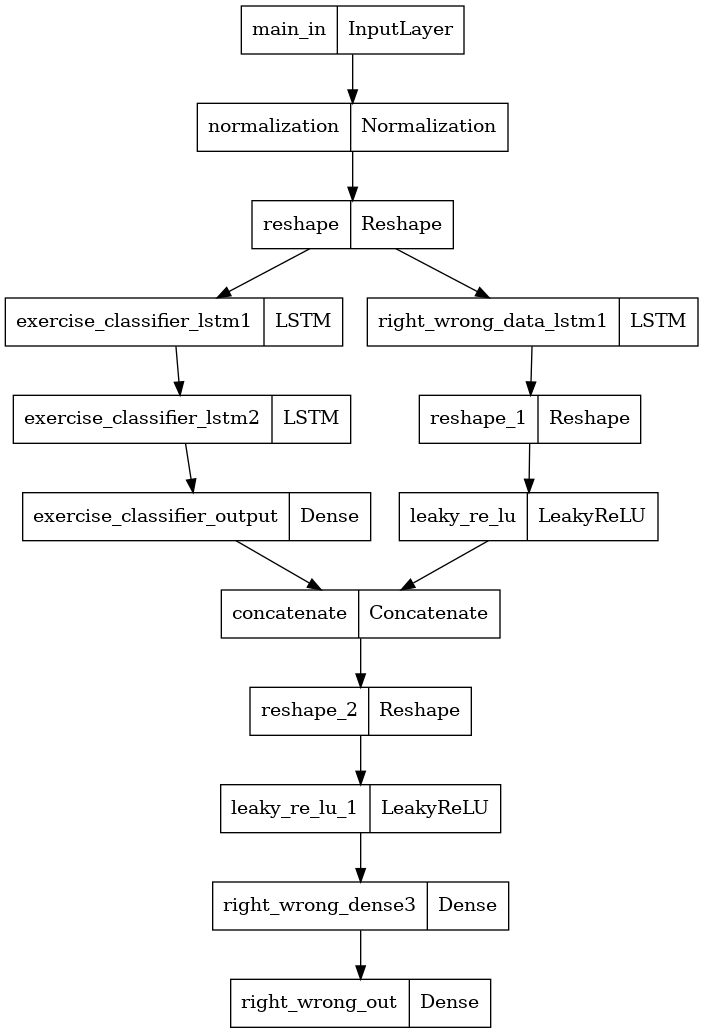

In [111]:
tf.keras.utils.plot_model(full_model)

In [19]:
n_epochs: int = 75

exercise_model_save_path: str = os.path.join('..', 'models', 'pt-exercise-classifier', 'pt-exercise-classifier-best.mdl')

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=exercise_model_save_path, save_best_only=True, save_weights_only=True, initial_value_threshold=.85, verbose=0, monitor='val_accuracy')

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

exercise_classifier_model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

exercise_history = exercise_classifier_model.fit(X_train, y_ex_train, epochs=n_epochs, validation_data=(X_test, y_ex_test), callbacks=[checkpoint_callback])

Epoch 1/75
47/47 [==============================] - 6s 83ms/step - loss: 2.3097 - accuracy: 0.0960 - val_loss: 2.2878 - val_accuracy: 0.1600
Epoch 2/75
47/47 [==============================] - 3s 70ms/step - loss: 2.2260 - accuracy: 0.1347 - val_loss: 2.0424 - val_accuracy: 0.1920
Epoch 3/75
47/47 [==============================] - 3s 70ms/step - loss: 1.9488 - accuracy: 0.2380 - val_loss: 1.8005 - val_accuracy: 0.3000
Epoch 4/75
47/47 [==============================] - 3s 72ms/step - loss: 1.7415 - accuracy: 0.2853 - val_loss: 1.7135 - val_accuracy: 0.2660
Epoch 5/75
47/47 [==============================] - 4s 79ms/step - loss: 1.5880 - accuracy: 0.3773 - val_loss: 1.4941 - val_accuracy: 0.3580
Epoch 6/75
47/47 [==============================] - 4s 75ms/step - loss: 1.3924 - accuracy: 0.4240 - val_loss: 1.4654 - val_accuracy: 0.4100
Epoch 7/75
47/47 [==============================] - 4s 78ms/step - loss: 1.2914 - accuracy: 0.4960 - val_loss: 1.1972 - val_accuracy: 0.5700
Epoch 8/75
47

In [20]:
history_df: pd.DataFrame = pd.DataFrame.from_dict(exercise_history.history)
history_df['epoch'] = history_df.index.values

total_num_epochs: int = history_df.shape[0]

history_df.describe()

,loss,accuracy,val_loss,val_accuracy,epoch
count,75.000000,75.000000,75.000000,75.00000,75.000000
mean,0.504336,0.800827,0.603504,0.77200,37.000000
std,0.488707,0.189249,0.416373,0.16639,21.794495
min,0.130169,0.096000,0.281036,0.16000,0.000000
25%,0.212827,0.776000,0.371476,0.76600,18.500000
50%,0.281101,0.883333,0.430580,0.84000,37.000000
75%,0.593502,0.906667,0.637996,0.86100,55.500000
max,2.309703,0.952000,2.287787,0.90200,74.000000


In [21]:
val_hist_df: pd.DataFrame = history_df[['val_loss', 'val_accuracy', 'epoch']].rename({'val_loss': 'loss', 'val_accuracy': 'accuracy'}, axis=1)
val_hist_df['type'] = 'validation'
train_hist_df: pd.DataFrame = history_df[['loss', 'accuracy', 'epoch']].copy()
train_hist_df['type'] = 'training'
acc_df: pd.DataFrame = pd.concat([val_hist_df, train_hist_df])
acc_df.describe()

,loss,accuracy,epoch
count,150.000000,150.000000,150.000000
mean,0.553920,0.786413,37.000000
std,0.455184,0.178175,21.721236
min,0.130169,0.096000,0.000000
25%,0.281052,0.770000,18.250000
50%,0.387989,0.854000,37.000000
75%,0.619874,0.890000,55.750000
max,2.309703,0.952000,74.000000


<Figure size 825x587.5 with 0 Axes>

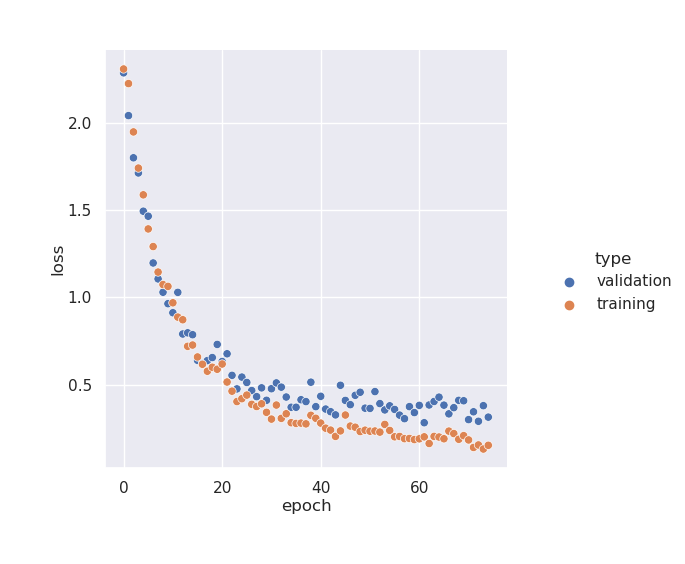

In [22]:
plt.clf()
sns.relplot(data=acc_df, x='epoch', y='loss', hue='type')
plt.show()

<Figure size 825x587.5 with 0 Axes>

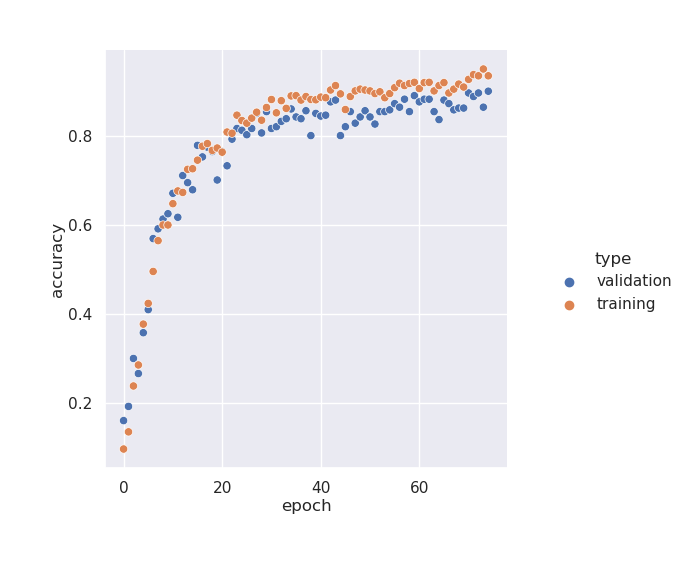

In [23]:
plt.clf()
sns.relplot(data=acc_df, x='epoch', y='accuracy', hue='type')
plt.show()

In [112]:
# Load the best exercise classifier model.

exercise_classifier_model.load_weights(exercise_model_save_path)

# Freeze the exercise classifier layers once we're done training it up.

for ex_layer in exercise_classifier_model.layers:
    full_model.get_layer(ex_layer.name).set_weights(ex_layer.get_weights())
    full_model.get_layer(ex_layer.name).trainable = False

In [113]:
[(layer.name, layer.trainable) for layer in full_model.layers]

[('main_in', False),
 ('normalization', False),
 ('reshape', False),
 ('exercise_classifier_lstm1', False),
 ('right_wrong_data_lstm1', True),
 ('exercise_classifier_lstm2', False),
 ('reshape_1', True),
 ('exercise_classifier_output', False),
 ('leaky_re_lu', True),
 ('concatenate', True),
 ('reshape_2', True),
 ('leaky_re_lu_1', True),
 ('right_wrong_dense3', True),
 ('right_wrong_out', True)]

In [114]:
# STarts overfitting at Epoch 15
n_epochs: int = 25

best_model_checkpoint_path: str = os.path.join('..', 'models', 'pt-exercise-right-wrong', 'pt-exercise_right-wrong_best.mdl')
    
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=best_model_checkpoint_path, save_best_only=True, save_weights_only=True, initial_value_threshold=.8, verbose=0, monitor='val_right_wrong_out_accuracy')

# tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) # 'binary_crossentropy'
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

full_model.compile(optimizer='adam', loss={'right_wrong_out': loss}, metrics={'right_wrong_out': ['accuracy']})
# 'exercise_classifier_output': y_ex_train,
history = full_model.fit(X_train, {'right_wrong_out': y_rw_train}, epochs=n_epochs, validation_data=(X_test, y_rw_test), callbacks=[checkpoint_callback])

Epoch 1/25
47/47 [==============================] - 6s 59ms/step - loss: 0.6676 - right_wrong_out_loss: 0.6676 - right_wrong_out_accuracy: 0.5633 - val_loss: 0.6685 - val_right_wrong_out_loss: 0.6685 - val_right_wrong_out_accuracy: 0.6080
Epoch 2/25
47/47 [==============================] - 2s 43ms/step - loss: 0.6156 - right_wrong_out_loss: 0.6156 - right_wrong_out_accuracy: 0.6640 - val_loss: 0.6153 - val_right_wrong_out_loss: 0.6153 - val_right_wrong_out_accuracy: 0.6700
Epoch 3/25
47/47 [==============================] - 2s 43ms/step - loss: 0.5775 - right_wrong_out_loss: 0.5775 - right_wrong_out_accuracy: 0.6867 - val_loss: 0.5905 - val_right_wrong_out_loss: 0.5905 - val_right_wrong_out_accuracy: 0.6620
Epoch 4/25
47/47 [==============================] - 2s 43ms/step - loss: 0.5395 - right_wrong_out_loss: 0.5395 - right_wrong_out_accuracy: 0.7133 - val_loss: 0.5849 - val_right_wrong_out_loss: 0.5849 - val_right_wrong_out_accuracy: 0.6880
Epoch 5/25
47/47 [==========================

In [115]:
history_df: pd.DataFrame = pd.DataFrame.from_dict(history.history)
history_df['epoch'] = history_df.index.values

total_num_epochs: int = history_df.shape[0]

history_df.describe()

,loss,right_wrong_out_loss,right_wrong_out_accuracy,val_loss,val_right_wrong_out_loss,val_right_wrong_out_accuracy,epoch
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.342902,0.342902,0.836853,0.506032,0.506032,0.772480,12.000000
std,0.157156,0.157156,0.101787,0.061522,0.061522,0.064806,7.359801
min,0.125974,0.125974,0.563333,0.433906,0.433906,0.608000,0.000000
25%,0.202457,0.202457,0.782667,0.464812,0.464812,0.740000,6.000000
50%,0.330818,0.330818,0.858667,0.494641,0.494641,0.796000,12.000000
75%,0.448710,0.448710,0.914667,0.543232,0.543232,0.824000,18.000000
max,0.667617,0.667617,0.958667,0.668477,0.668477,0.846000,24.000000


In [116]:
val_df: pd.DataFrame = history_df[['epoch', 'val_right_wrong_out_accuracy', 'val_right_wrong_out_loss']].copy().rename({'val_right_wrong_out_accuracy': 'accuracy', 'val_right_wrong_out_loss': 'loss'}, axis=1)
val_df['stage'] = 'validation'
train_df: pd.DataFrame = history_df[['epoch', 'right_wrong_out_accuracy', 'right_wrong_out_loss']].rename({'right_wrong_out_accuracy': 'accuracy', 'right_wrong_out_loss': 'loss'}, axis=1)
train_df['stage'] = 'training'

results_df: pd.DataFrame = pd.concat([val_df, train_df], ignore_index=True)
results_df.head()

,epoch,accuracy,loss,stage
0,0,0.608,0.668477,validation
1,1,0.670,0.615311,validation
2,2,0.662,0.590454,validation
3,3,0.688,0.584898,validation
4,4,0.700,0.553637,validation


<Figure size 825x587.5 with 0 Axes>

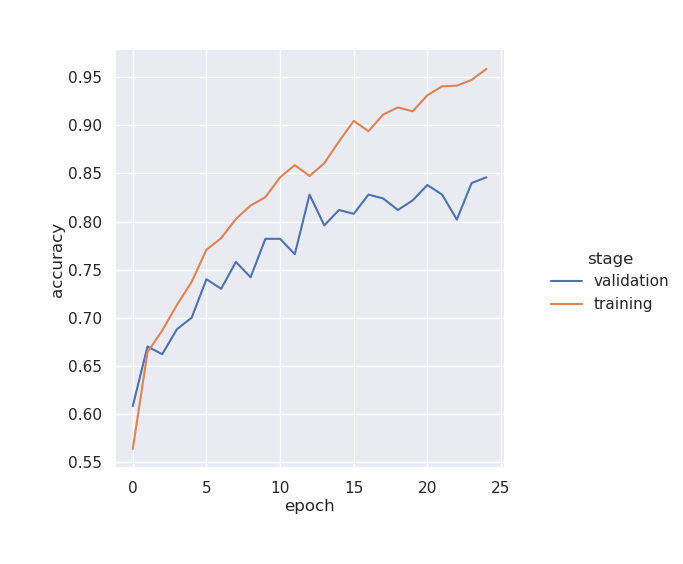

In [117]:
plt.clf()
ax = sns.relplot(data=results_df, x='epoch', y='accuracy', hue='stage', kind='line')
plt.show()

<Figure size 825x587.5 with 0 Axes>

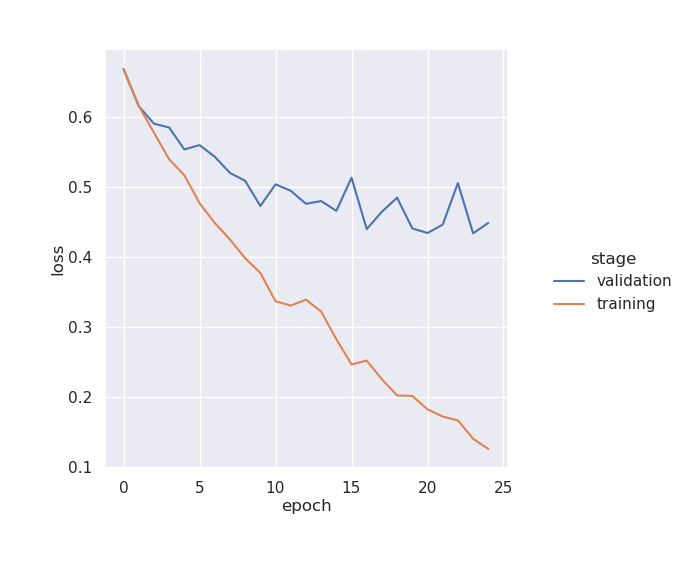

In [118]:
plt.clf()
ax = sns.relplot(data=results_df, x='epoch', y='loss', hue='stage', kind='line')
plt.show()